<a href="https://colab.research.google.com/github/YangHyunu/SKT-FLY-AI-5/blob/main/1%EC%A3%BC%EC%B0%A8/4%EC%9D%BC_08_%EB%8B%A4%EC%A4%91%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4_%ED%8E%AD%EA%B7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정나무, 다중의사결정나무, 펭귄 데이터셋

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##1. 데이터 준비

In [ ]:
# ! wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/penguins.csv

In [ ]:
penguin = pd.read_csv('penguins.csv')

In [ ]:
penguin.head()

,Species,Island,Culmen Length(mm),Culmen Depth(mm),Flipper Length(mm),Body Mass(g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
penguin.shape

(344, 7)

In [ ]:
df = penguin.copy()

In [ ]:
df.head()

,Species,Island,Culmen Length(mm),Culmen Depth(mm),Flipper Length(mm),Body Mass(g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.columns

Index(['Species', 'Island', 'Culmen Length(mm)', 'Culmen Depth(mm)',
       'Flipper Length(mm)', 'Body Mass(g)', 'Sex'],
      dtype='object')

## 칼럼명 전처리 !

In [ ]:
df.columns = [col.lower().replace(' ','_').replace('(','_').replace(')','') for col in df.columns]

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


섬이랑 성별 원 핫 인코딩 필요한것 같다. 나머지 수치형은 표준화

In [ ]:
df.shape

(344, 7)

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df.duplicated().sum()


0

## 범주형 변수

In [ ]:
col_cate=df.select_dtypes(include=['object'])
col_cate

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,FEMALE
...,...,...,...
339,Gentoo,Biscoe,NaN
340,Gentoo,Biscoe,FEMALE
341,Gentoo,Biscoe,MALE
342,Gentoo,Biscoe,FEMALE


In [ ]:
col_cate.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
col_cate['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [ ]:
col_cate['island'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


- 성별에 .이라는 결측치가 존재

In [ ]:
col_cate['sex'].value_counts()
col_cate.loc[col_cate['sex']=='.']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
col_cate.loc[col_cate['sex']=='.'] = 'FEMALE'

In [ ]:
df.sex.value_counts()
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<Axes: xlabel='sex', ylabel='count'>

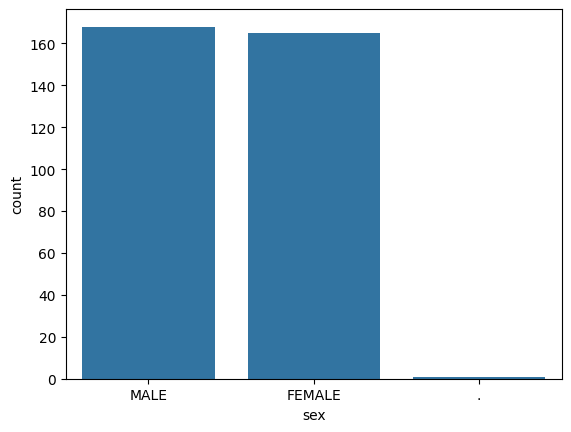

In [ ]:
sns.countplot(x=df['sex'])

# 데이터 그루핑

In [ ]:
g=df.groupby('island')['species'].value_counts() # Torgersen 섬에는 Adelie만 있다. 실제로 Torgersen섬에 Adelie만 사는지 인터넷 검색필요 (EDA 할 적에)

# 연속형 변수

In [ ]:
col_nums =df.select_dtypes(include=['number'])
col_nums

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


## 이상치
  - 박스 플롯 시각화

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
axes = axes.flatten()

for i,col in enumerate(col_nums):
  sns.boxplot(y=col,data=col_nums,ax=axes[i])
  axes[i].set_xlabel(None)
  axes[i].set_ylabel(None)
  axes[i].set_title(col)

NameError: name 'plt' is not defined

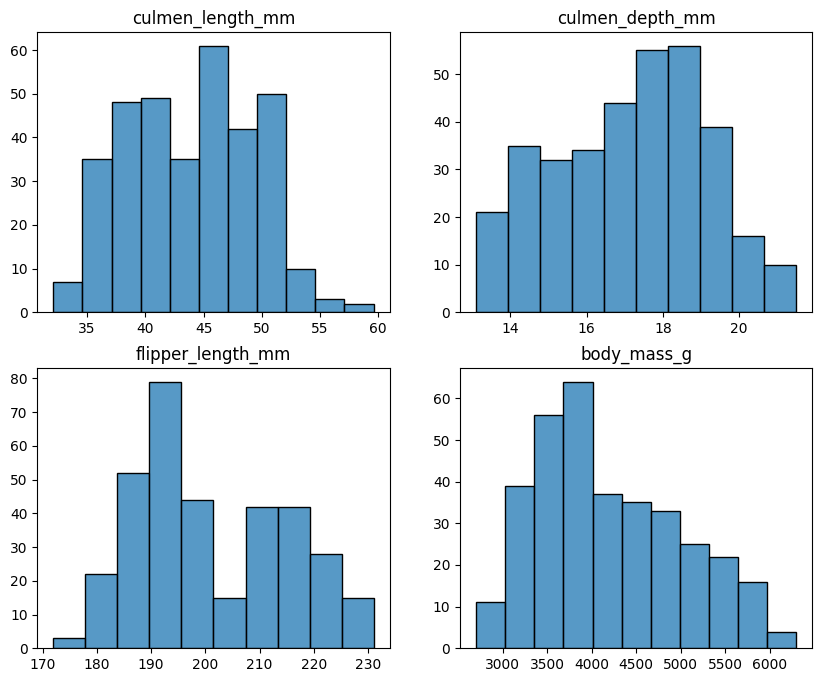

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(10,8))
axes = axes.flatten()
for i,col in enumerate(col_nums):
  sns.histplot(x=col,data=col_nums,ax=axes[i])
  axes[i].set_xlabel(None)
  axes[i].set_ylabel(None)
  axes[i].set_title (col)



# 2.데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,test_size=0.2,random_state=42,stratify=df['species'])

In [ ]:
df_train.shape, df_test.shape

((275, 7), (69, 7))

In [ ]:
df_train.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

- **heatmap으로 결측치 확인**

In [ ]:
sns.heatmap(df_train.isna()) # 결측치 True가 하얀색

NameError: name 'sns' is not defined

In [ ]:
df_train.dropna(inplace=True)

In [ ]:
df_train.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# X,y 분리

In [ ]:
X_train = df_train.drop('species',axis=1)
y_train = df_train['species']
X_train.shape, y_train.shape

((265, 6), (265,))

In [ ]:
X_train.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,265.000000,265.000000,265.000000,265.000000
mean,44.163396,17.183019,200.969811,4220.754717
std,5.499668,2.007084,13.911756,809.351941
min,33.100000,13.100000,172.000000,2700.000000
25%,39.600000,15.600000,190.000000,3550.000000
50%,45.100000,17.300000,197.000000,4050.000000
75%,48.700000,18.800000,213.000000,4800.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
X_train[['island','sex']]=oe.fit_transform(X_train[['island','sex']])

In [ ]:
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
98,1.0,33.1,16.1,178.0,2900.0,1.0
114,0.0,39.6,20.7,191.0,3900.0,1.0
118,2.0,35.7,17.0,189.0,3350.0,1.0
303,0.0,50.0,15.9,224.0,5350.0,2.0
343,0.0,49.9,16.1,213.0,5400.0,2.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y_train_e =le.fit_transform(y_train)
y_train_e


array([0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2,
       0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1,
       2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       1])

## 스케일링

In [ ]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
X_train_s = rs.fit_transform(X_train)
X_train_s

array([[ 0.        , -1.31868132, -0.375     , -0.82608696, -0.92      ,
        -1.        ],
       [-1.        , -0.6043956 ,  1.0625    , -0.26086957, -0.12      ,
        -1.        ],
       [ 1.        , -1.03296703, -0.09375   , -0.34782609, -0.56      ,
        -1.        ],
       ...,
       [ 1.        , -0.25274725,  0.375     , -0.08695652,  0.16      ,
         0.        ],
       [ 1.        , -0.92307692,  0.46875   , -0.43478261, -0.2       ,
        -1.        ],
       [ 0.        ,  0.62637363,  0.53125   ,  0.56521739,  0.04      ,
         0.        ]])

#3. 모델학습

In [ ]:
print(X_train_s.shape, y_train_e.shape)
print(type(X_train_s),type(y_train_e))

(265, 6) (265,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_s,y_train_e)


DecisionTreeClassifier(random_state=42)

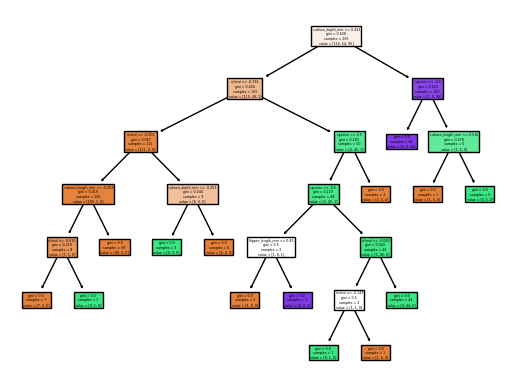

In [ ]:
from sklearn.tree import plot_tree

plot_tree(clf,filled=True,feature_names=df.columns)
plt.show()

## 테스트 데이터 전처리

In [ ]:
df_test = df_test.dropna() # or df_test.dropna(inplace=True)
X_test = df_test.drop('species',axis=1)
y_test = df_test['species']
X_test.shape, y_test.shape


((69, 6), (69,))

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
X_test[['island','sex']]=oe.fit_transform(X_test[['island','sex']])

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y_test_e =le.fit_transform(y_test)
y_test_e

from sklearn.preprocessing import StandardScaler
rs=StandardScaler()
X_test_s = rs.fit_transform(X_test)
X_test_s

array([[ 0.51659068, -0.35089501,  0.78893732, -0.01305152, -0.20889657,
         1.01459931],
       [ 1.94238094, -0.73128395,  0.18039725, -1.05215368, -0.46344603,
        -0.98561076],
       [-0.90919959,  0.58105788, -1.14732653,  1.02605064,  0.68202655,
        -0.98561076],
       [-0.90919959,  1.03752461, -0.48346464,  1.4416915 ,  2.33659804,
         1.01459931],
       [ 0.51659068,  0.52399954,  0.62297185, -1.6063415 , -1.16345705,
        -0.98561076],
       [-0.90919959, -1.07363399, -0.59410829, -1.25997412, -1.38618783,
        -0.98561076],
       [ 0.51659068,  1.17066073,  1.06554644, -0.082325  , -0.46344603,
         1.01459931],
       [-0.90919959,  1.41791354,  0.12507543,  1.85733236,  1.82749912,
         1.01459931],
       [ 0.51659068,  0.58105788,  0.40168455, -0.7057863 , -0.59072076,
        -0.98561076],
       [ 0.51659068,  0.98046627,  0.23571908, -0.7057863 , -0.97254495,
         1.01459931],
       [ 1.94238094, -1.66323684,  2.22730476, -0.

In [ ]:
y_pred = clf.predict(X_test_s)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true,y_pred,aver='macro'):
  print('accuracy',accuracy_score(y_true,y_pred))
  print('recall',recall_score(y_true,y_pred,average=aver))
  print('precision',precision_score(y_true,y_pred,average=aver))
  print('f1_score',f1_score(y_true,y_pred, average=aver))

  cfm = confusion_matrix(y_true,y_pred)
  s = sns.heatmap(cfm,annot=True,cmap='Blues',fmt='d',cbar=False)
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()

In [ ]:
confusion_matrix(y_test_e,y_pred)

NameError: name 'confusion_matrix' is not defined

accuracy 0.7681159420289855
recall 0.6444444444444445
precision 0.5555555555555555
f1_score 0.5925925925925926


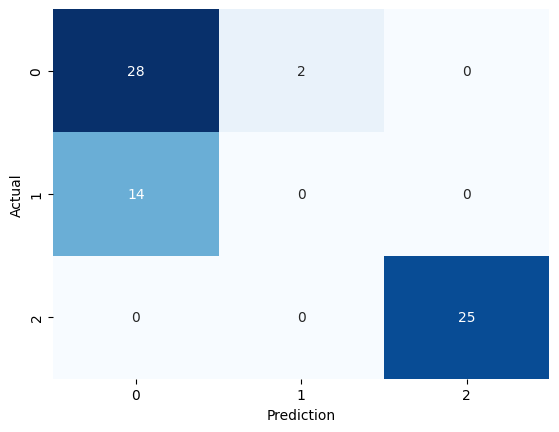

In [ ]:
print_metrics(y_test_e,y_pred)

# 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_r = RandomForestClassifier(n_estimators=100,random_state=42)
clf_r.fit(X_train_s,y_train_e)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = clf_r.predict(X_test_s)

In [ ]:
confusion_matrix(y_test_e,y_pred)

array([[29,  1,  0],
       [ 3, 11,  0],
       [ 0,  0, 25]])

accuracy 0.9420289855072463
recall 0.9174603174603174
precision 0.9409722222222222
f1_score 0.9272125723738626


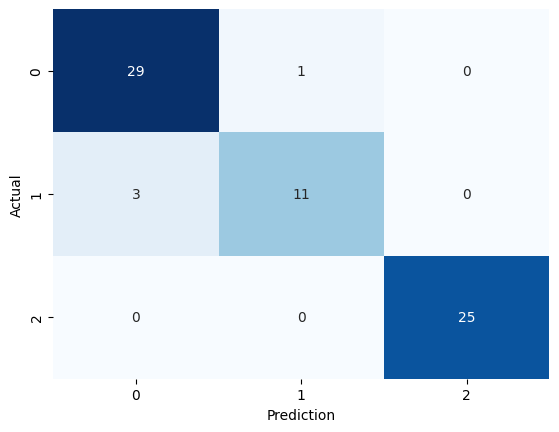

In [ ]:
print_metrics(y_test_e,y_pred)

accuracy 0.9420289855072463
recall 0.9174603174603174
precision 0.9409722222222222
f1_score 0.9272125723738626


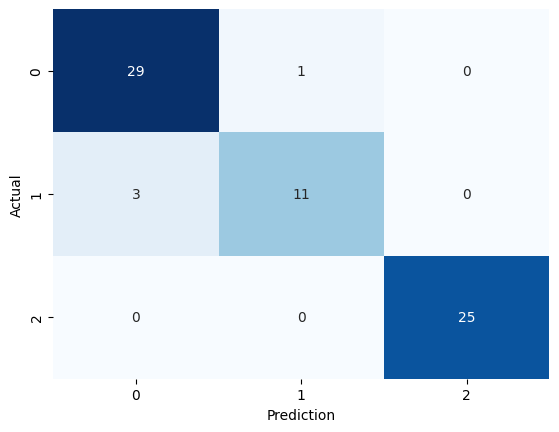

In [ ]:
print_metrics(y_test_e,y_pred)

accuracy 0.9420289855072463
recall 0.9174603174603174
precision 0.9409722222222222
f1_score 0.9272125723738626


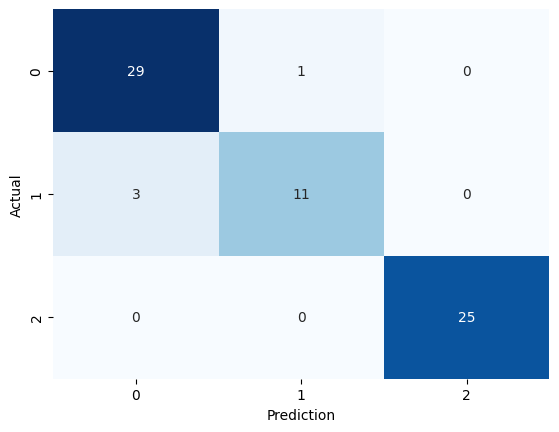

In [ ]:
print_metrics(y_test_e,y_pred)

## SVC

In [ ]:
from sklearn.svm import SVC
clf = SVC(random_state=42)
clf.fit(X_train_s,y_train_e)

SVC(random_state=42)

In [ ]:
y_pred_svc = clf.predict(X_test_s)

accuracy 0.8840579710144928
recall 0.8095238095238096
precision 0.9298245614035089
f1_score 0.8274509803921569


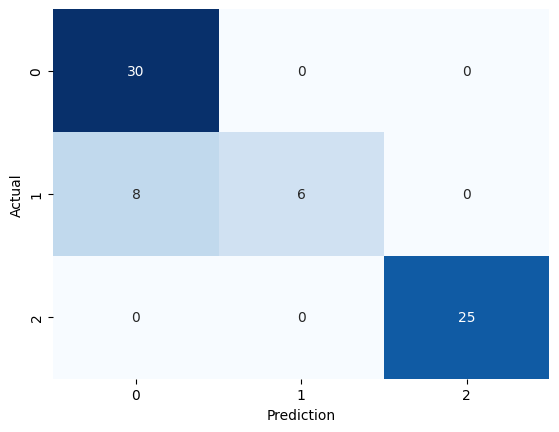

In [ ]:
print_metrics(y_test_e,y_pred_svc)